## P(r) function calculation

A simple example demonstarting pair distance distribution function P(r) inversion. In SasView it is calculated using Moore formula (1980)

## Load modules
**Note:** No sasmodels

In [1]:
from sasview.src.sas.sascalc.dataloader.loader import Loader
from sas.sascalc.pr.invertor import Invertor
import matplotlib.pyplot as plt
import numpy as np

## Load data

In [2]:
loader = Loader()
test_data = loader.load("sphere_80_err.txt")
x_data = test_data[0].x
y_data = test_data[0].y
z_data = test_data[0].dy

## Setup invertor object

In [3]:
pr = Invertor()
pr.x = x_data
pr.y = y_data
pr.err = z_data

pr.alpha = 2.6e-5
pr.d_max = 160

## Perform inversion

In [4]:
#nfunc - number of base functions to use.
out, cov = pr.invert(nfunc=13)
pr_value = []
err_value = []
r = np.arange(0.0, pr.d_max, pr.d_max / pr.x.size)
for r_i in r:
    (value, err) = pr.pr_err(out, cov, r_i)
    pr_value.append(value)
    err_value.append(err)

## Plot results

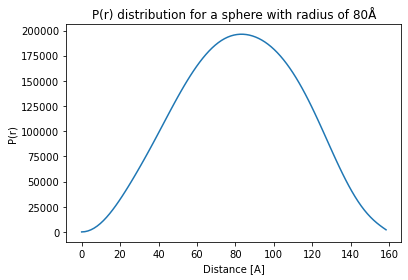

In [5]:
plt.plot(r,pr_value)
plt.xlabel("Distance [A]")
plt.ylabel("P(r)")
plt.title('P(r) distribution for a sphere with radius of 80Å')
plt.show()